In [2]:
!pip install cirq
!pip install qiskit

     |████████████████████████████████| 1.4MB 1.9MB/s 
     |████████████████████████████████| 1.2MB 37kB/s 
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


     |████████████████████████████████| 6.7MB 2.5MB/s 
     |████████████████████████████████| 23.4MB 1.5MB/s 
     |████████████████████████████████| 163kB 44.8MB/s 
     |████████████████████████████████| 174kB 43.6MB/s 
     |████████████████████████████████| 1.9MB 44.8MB/s 
     |████████████████████████████████| 5.6MB 36.4MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 768kB 35.9MB/s 
     |████████████████████████████████| 296kB 38.5MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 573kB 35.4MB/s 
     |████████████████████████████████| 26.0MB 1.4MB/s 
     |████████████████████████████████| 2.7MB 38.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.2-cp36-none-any.whl size=2896 sha256=22edbe9e90d36286a88d2342e67cbbcda6969334a4e9d0da7b0df26b7a294b93
  Stored in directory: /root/.cache/pip/wheels/d8/29/6e/e065f721b42fe704

In [0]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
import numpy as np
import cirq
from cirq.contrib.svg import SVGCircuit

[[-0.41718438 -0.49486596 -0.0425724  -0.76108637]
 [-0.46710445  0.33386302  0.81871984 -0.00683711]
 [-0.51168282 -0.56079186 -0.05783281  0.64834292]
 [-0.58817626  0.57372089 -0.56968481 -0.01876809]]


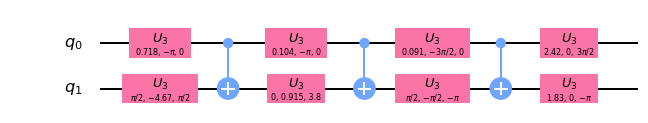

In [4]:
q=2
A=np.random.rand(2**q,2**q)
U,S,V=np.linalg.svd(A)
print(U)
qc=QuantumCircuit(q)
qc.unitary(U,list(range(q)))
qc=transpile(qc,basis_gates=['cx','u3'])
qc.draw(output='mpl')

In [5]:
qc.data[0][0]._params, qc.data[0][0].name, qc.data[1][1][0].register, qc.data[1][1][0].index

([0.7180142366493465, -3.1415926535897825, 0.0],
 'u3',
 QuantumRegister(2, 'q'),
 1)

In [6]:
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


[[-0.265-0.499j  0.499-0.007j  0.296+0.513j  0.253-0.124j]
 [ 0.39 -0.169j  0.376+0.027j  0.023-0.136j -0.65 -0.485j]
 [-0.062-0.04j  -0.65 +0.008j  0.115+0.615j -0.357-0.229j]
 [ 0.399-0.578j -0.393-0.178j  0.354-0.335j  0.282-0.058j]]
[[-0.469+0.316j -0.059-0.496j  0.48 -0.348j -0.15 -0.239j]
 [-0.208-0.371j -0.012-0.377j -0.138-0.008j -0.415+0.697j]
 [-0.034+0.066j  0.075+0.646j  0.6  -0.178j -0.191+0.378j]
 [-0.617-0.337j -0.137+0.409j -0.37 -0.318j -0.087-0.274j]]


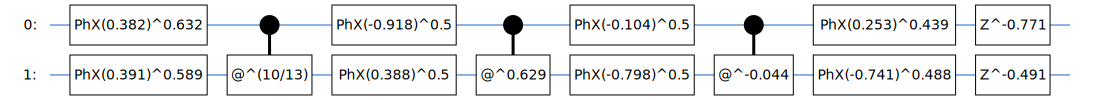

In [7]:
import cirq

desired_matrix = cirq.testing.random_unitary(dim=4)

synthesized_operations = cirq.two_qubit_matrix_to_operations(
    cirq.LineQubit(0),
    cirq.LineQubit(1),
    desired_matrix,
    allow_partial_czs=True,
)
circuit = cirq.Circuit(synthesized_operations)

synthesized_matrix = cirq.unitary(circuit)

cirq.testing.assert_allclose_up_to_global_phase(
    desired_matrix,
    synthesized_matrix,
    atol=1e-4
)

print(desired_matrix.round(3))
print(synthesized_matrix.round(3))
SVGCircuit(circuit)